# Task 7: Support Vector Machines (SVM)
##  Objective: Use SVMs for linear and non-linear classification.
 ## Tools:  Scikit-learn, NumPy, Matplotlib

In [8]:
# import required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from  sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
df = pd.read_csv('C:\\Users\\prach\\Downloads\\breast-cancer.csv')
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
#Enode the target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

# Drop  the id and unnamed columns if exist 
df = df.drop(columns= [col for col in df.columns  if 'id' in col.lower() or 'Unnamed' in col])

# sepreate feature and target 
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (569, 30)
y shape: (569,)


In [29]:
from sklearn.preprocessing import StandardScaler

# split and scale 
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

scaler = StandardScaler()

# standardlize or normalize the data(specilly features in X_train and X_test)  before using in ML model

X_train_scaled = scaler.fit_transform(X_train)
# fit calculate the mean and standard deviation  from the trainning data
#  tranform use those values to standardize the data
# X_train_scaled : scaled version of X_train

X_test_scaled = scaler.transform(X_test)
# standize the X_test 

In [30]:
 # train linear and RBF SVM( support vector machine )  models
    # linear kernal:when data is linear seperable 
    # kernel='linear' means the model will try to separate the data using a straight line (or a plane in higher dimensions).
    # rbf kernal : capture non linear relationship
#C=1.0 is a parameter that controls how much the model tries to avoid misclassifying training data.



# linear kernal svm 
svm_linear = SVC(kernel='linear', C=1.0) # linear SVM model (draw straight line to seprate class)

svm_linear.fit(X_train_scaled, y_train) # train the model using scaled traning data and the labelsy_train

# RBF ( non-linear) kernal SVM  (rbf: radial basis function:non-linear )
svm_rbf= SVC(kernel = 'rbf', C=1.0, gamma ='scale')  # create another SVM model with RBF kernal
svm_rbf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [21]:
# Evalute linear SVM 
print("Linear SVM Report:")

# classification_report(..): compare the predicted labels iwth the actual label
print( classification_report(y_test, svm_linear.predict(X_test_scaled)))

#Evalute RBF SVM 
print("RBF SVMReport:")
print(classification_report(y_test, svm_rbf.predict(X_test_scaled)))

Linear SVM Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF SVMReport:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:
# classifiation report showing 
    # Precision: how many predictive postive were correct
    # Recall: how many actual positives were correctly predicted?
    # F1-score:a balance beteen precision and recall
    # how many true instances were there for each class?

In [ ]:
# cv = 5 mean : 5 fold cross validation 
# train on 4 parts 
# test on 1 part(remaing)
# repeat 5 times(each part get a chance to be the test)
#then it gives you 5 accuracy scores ( one for each fold)

In [24]:
#Cross validation score

linear_cv_scores = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5)
rbf_cv_scores = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5)

print("Linear CV Accuracy:", np.mean(linear_cv_scores))  # it gives you average accuracy (mean of 5 scores)
print("RBF CV Accuracy:", np.mean(rbf_cv_scores))



Linear CV Accuracy: 0.9692307692307693
RBF CV Accuracy: 0.9758241758241759


In [ ]:
# Hyperparameter tuning(GridSearchCV): some setting schangeto imporve performance-- like how 
#       strictthe model is or  how it handel complexixty

# we dont learn these values form the data, we manually test differntly combinations using tools like GridSearchCV.

In [31]:

# grid seaarch for best parameters
param_grid={
    'C':[0.1, 1, 10],  # low C: more tolerent to error, high:less tolerent (stricter)
    'gamma':['scale', 0.01,0.001],  # lower = smooth decision bounadary 
    'kernel':['rbf']  #type of kernla were you only test rbf (non- linear) kernal
}

grid = GridSearchCV(SVC(), param_grid, refit =True, cv=5,verbose=1)
#GridSearchCV() : uses to search the best combination parameter


grid.fit(X_train_scaled,y_train)
#this start teh seach , it goes through every comination in param_grid,evaluates them using 5 fol crossvalidation
#  and find the best one 


print("best parameter:", grid.best_params_)  # best combination of parameter 
print("best CV score:", grid.best_score_)   # best cross validation

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best parameter: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best CV score: 0.9758241758241759


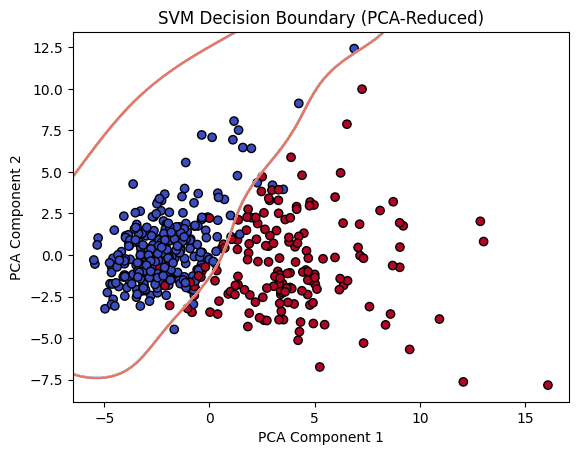

In [32]:
# visualize desision bounadary (@D with PCA)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train_scaled)

# train model on PCA-reduced data
svm_vis = SVC(kernel='rbf', C=1, gamma ='scale')
svm_vis.fit(X_vis, y_train)

#plot decision boundary

def plot_decision_boundary(X,y, model):
    h =0.02
    x_min,x_max =X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx,yy,Z,alpha=0.8,  cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary (PCA-Reduced)')
    plt.show()

plot_decision_boundary(X_vis, y_train, svm_vis)
    

## ✅ Conclusion
I worked on classifying breast cancer tumors using Support Vector Machines (SVM).

Loaded and preprocessed the dataset by:

Encoding the target variable (diagnosis)

Dropping irrelevant columns like id

Splitting the data and applying feature scaling

Trained two SVM models:

Linear SVM for linear classification

RBF kernel SVM for non-linear classification

Evaluated both models:

RBF kernel SVM performed better, achieving ~98% accuracy

Used classification reports and cross-validation for model evaluation

Applied GridSearchCV to tune hyperparameters (C, gamma) and improve performance

Used PCA (Principal Component Analysis) to reduce data to 2D for visualization

Plotted the decision boundary of the RBF SVM model

Overall, this task demonstrated how powerful SVMs are for binary classification tasks, especially with proper preprocessing and tuning